# <center>Decision Trees</center>

decision tree is a classification algorithm. We will use this algorithm to build a model from historical data from patients and their response to different medications. Then we'll use this decision tree to predict the class of an unknown patient or to find a proper drug to a new patient.

In [32]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

### About dataset
Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. 

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and the target is the drug that each patient responded to. 

It is a sample of binary classifier, and you can use the training part of the dataset 
to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe it to a new patient.


# Download dataset

In [33]:
!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

--2020-01-15 20:40:05--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
wget: Cannot read /home/tasnuva/.netrc (Permission denied).
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.89K  --.-KB/s    in 0s      

2020-01-15 20:40:07 (1.20 GB/s) - ‘drug200.csv’ saved [6027/6027]



In [34]:
my_data = pd.read_csv('drug200.csv', delimiter=',')

In [35]:
my_data

Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]

In [36]:
my_data.head()

Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY

## Pre-processing

Using <b>my_data</b> as the Drug.csv data read by pandas, declare the following variables: <br>
<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li></ul>
<ul>
    
<li> <b> y </b> as the <b> response vector (target) </b> </li>


   
</ul>

In [37]:
# pd.set_option('display.max_rows',200)
pd.reset_option('display.max_rows',15)
my_data

Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]

In [38]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043],
       [22, 'F', 'NORMAL', 'HIGH', 8.607000000000001],
       [49, 'F', 'NORMAL', 'HIGH', 16.275],
       [41, 'M', 'LOW', 'HIGH', 11.037],
       [60, 'M', 'NORMAL', 'HIGH', 15.171],
       [43, 'M', 'LOW', 'NORMAL', 19.368],
       [47, 'F', 'LOW', 'HIGH', 11.767000000000001],
       [34, 'F', 'HIGH', 'NORMAL', 19.199],
       [43, 'M', 'LOW', 'HIGH', 15.376],
       [74, 'F', 'LOW', 'HIGH', 20.941999999999997],
       [50, 'F', 'NORMAL', 'HIGH', 12.703],
       [16, 'F', 'HIGH', 'NORMAL', 15.515999999999998],
       [69, 'M', 'LOW', 'NORMAL', 11.455],
       [43, 'M', 'HIGH', 'HIGH', 13.972000000000001],
       [23, 'M', 'LOW', 'HIGH', 7.297999999999999],
       [32, 'F', 'HIGH', 'NORMAL', 25.974],
       [57, 'M', 'LOW', 'NORMAL', 19.128],
       [63, 'M

As some featurs in this dataset are catergorical such as __Sex__ or __BP__. Unfortunately, Sklearn Decision Trees do not handle categorical variables. But still we can convert these features to numerical values. __pandas.get_dummies()__
Convert categorical variable into dummy/indicator variables.

In [39]:
from sklearn import preprocessing

In [40]:
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F', 'M'])

LabelEncoder()

In [41]:
X[:, 1] = le_sex.transform(X[:,1])

In [42]:
X

array([[23, 0, 'HIGH', 'HIGH', 25.355],
       [47, 1, 'LOW', 'HIGH', 13.093],
       [47, 1, 'LOW', 'HIGH', 10.113999999999999],
       [28, 0, 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 0, 'LOW', 'HIGH', 18.043],
       [22, 0, 'NORMAL', 'HIGH', 8.607000000000001],
       [49, 0, 'NORMAL', 'HIGH', 16.275],
       [41, 1, 'LOW', 'HIGH', 11.037],
       [60, 1, 'NORMAL', 'HIGH', 15.171],
       [43, 1, 'LOW', 'NORMAL', 19.368],
       [47, 0, 'LOW', 'HIGH', 11.767000000000001],
       [34, 0, 'HIGH', 'NORMAL', 19.199],
       [43, 1, 'LOW', 'HIGH', 15.376],
       [74, 0, 'LOW', 'HIGH', 20.941999999999997],
       [50, 0, 'NORMAL', 'HIGH', 12.703],
       [16, 0, 'HIGH', 'NORMAL', 15.515999999999998],
       [69, 1, 'LOW', 'NORMAL', 11.455],
       [43, 1, 'HIGH', 'HIGH', 13.972000000000001],
       [23, 1, 'LOW', 'HIGH', 7.297999999999999],
       [32, 0, 'HIGH', 'NORMAL', 25.974],
       [57, 1, 'LOW', 'NORMAL', 19.128],
       [63, 1, 'NORMAL', 'HIGH', 25.916999999999998],
  

In [43]:
le_BP = preprocessing.LabelEncoder()
le_BP.fit(['LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])

le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 
X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

Now we can fill the target variable.

In [44]:
y = my_data['Drug']

In [45]:
y[:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

---
## Setting up the Decision Tree
We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.


Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [48]:
X_trainset.shape

(140, 5)

In [49]:
X_testset.shape

(60, 5)

In [50]:
y_trainset

77     drugY
73     drugY
71     drugY
78     drugA
42     drugY
       ...  
0      drugY
184    drugY
131    drugY
152    drugX
106    drugX
Name: Drug, Length: 140, dtype: object

In [51]:
y_testset.shape

(60,)

## Modeling
We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [54]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# prediction
Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.


In [55]:
predTree = drugTree.predict(X_testset)

print out <b>predTree</b> and <b>y_testset</b> as we want to visually compare the prediction to the actual values.

In [56]:
print(predTree)
print(predTree.shape)
print(y_testset.shape)

['drugY' 'drugX' 'drugX' 'drugX' 'drugX' 'drugC' 'drugY' 'drugA' 'drugB'
 'drugA' 'drugY' 'drugA' 'drugY' 'drugY' 'drugX' 'drugY' 'drugX' 'drugX'
 'drugB' 'drugX' 'drugX' 'drugY' 'drugY' 'drugY' 'drugX' 'drugB' 'drugY'
 'drugY' 'drugA' 'drugX' 'drugB' 'drugC' 'drugC' 'drugX' 'drugX' 'drugC'
 'drugY' 'drugX' 'drugX' 'drugX' 'drugA' 'drugY' 'drugC' 'drugY' 'drugA'
 'drugY' 'drugY' 'drugY' 'drugY' 'drugY' 'drugB' 'drugX' 'drugY' 'drugX'
 'drugY' 'drugY' 'drugA' 'drugX' 'drugY' 'drugX']
(60,)
(60,)


# Evaluation

Now check accuracy of our model with metrics of sklearn

In [57]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Accuracy of Decision tree is: ", metrics.accuracy_score(predTree, y_testset))

Accuracy of Decision tree is:  0.9833333333333333


__Accuracy classification score__ computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.  

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


In [58]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mapimg
from sklearn import tree
%matplotlib inline


In [59]:
# conda install python-graphviz

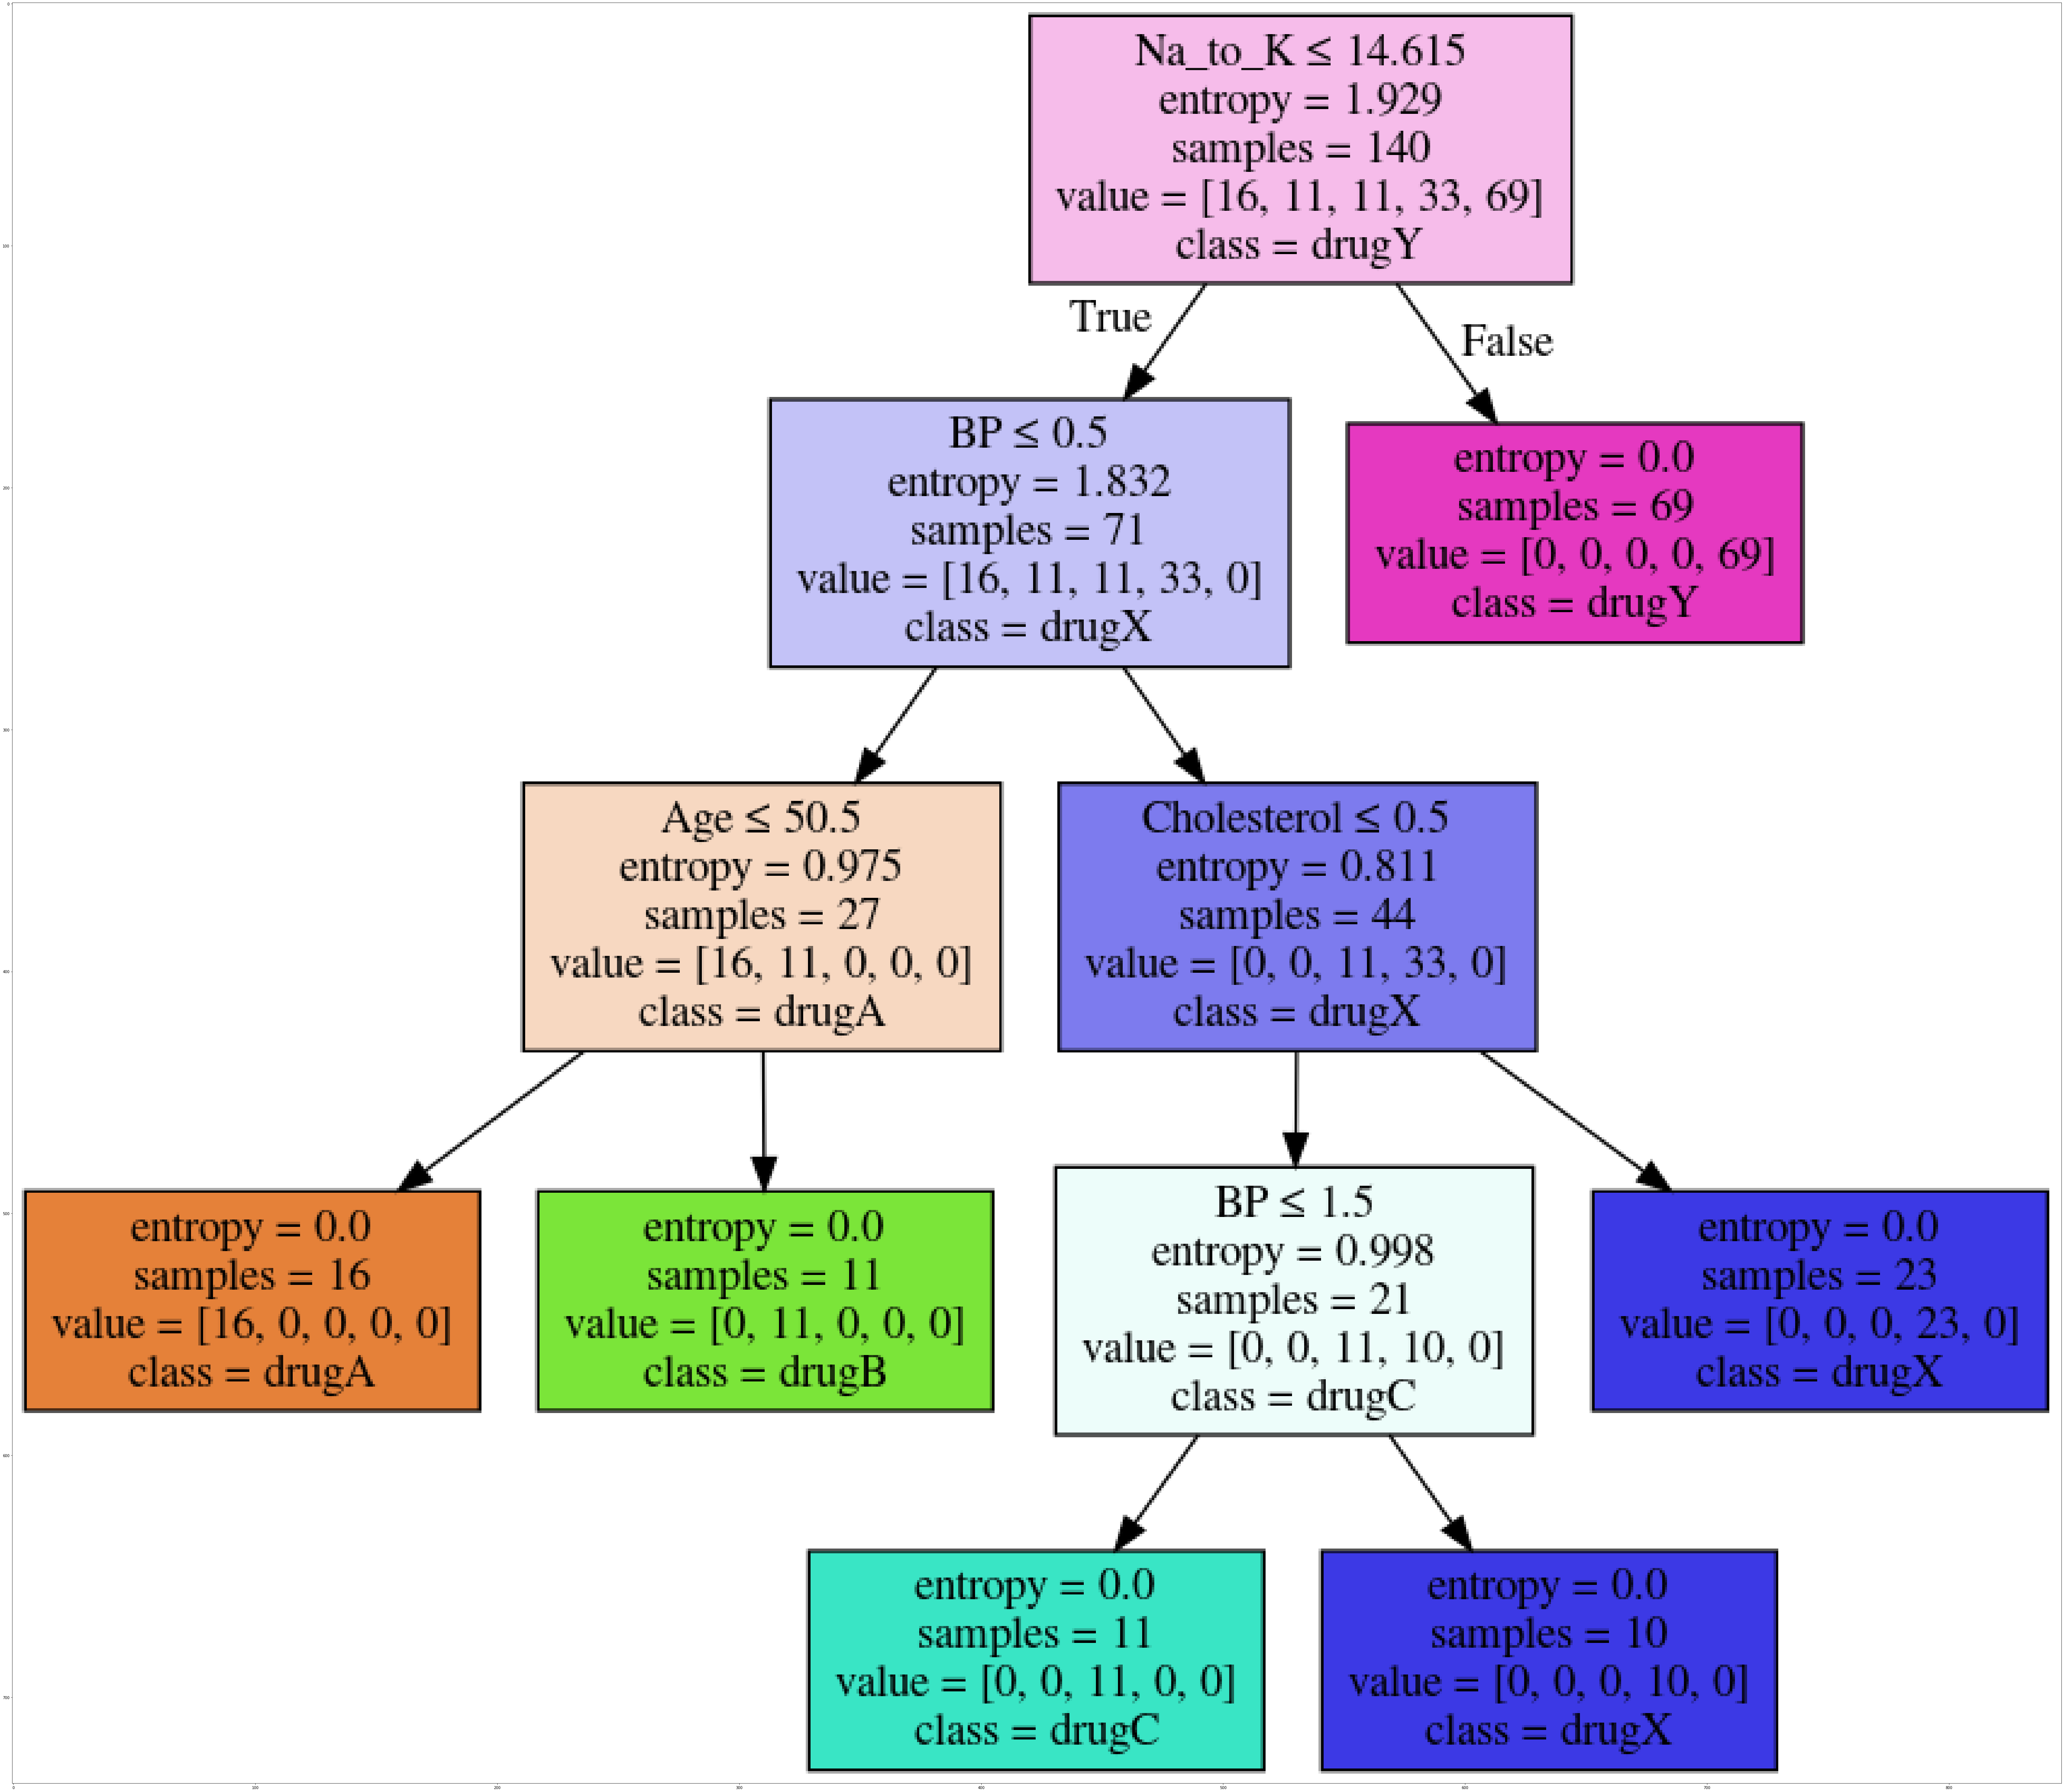

In [61]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:5]
targetNames = my_data["Drug"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mapimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [34]:
conda info --envs

# conda environments:
#
base                  *  /home/tasnuva/anaconda3
deep_learning            /home/tasnuva/anaconda3/envs/deep_learning
ipykernel_py3            /home/tasnuva/anaconda3/envs/ipykernel_py3
ml-cognitive             /home/tasnuva/anaconda3/envs/ml-cognitive
pysyft                   /home/tasnuva/anaconda3/envs/pysyft
udacity                  /home/tasnuva/anaconda3/envs/udacity
udacity_kernel           /home/tasnuva/anaconda3/envs/udacity_kernel


Note: you may need to restart the kernel to use updated packages.
